In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file (with header)
df = pd.read_csv('../omp_scaling_results/omp_thread_times.csv')

# Show the dataframe
df

,Thread,min,max,avg
0,1,10.328972,10.328972,10.328972
1,2,5.173797,5.296358,5.235078
2,4,2.109168,3.808676,2.784718
3,8,0.914023,1.905946,1.424998
4,16,0.339407,1.856942,0.795670
5,32,0.212164,1.819672,0.538996
6,56,0.295688,3.997122,0.526406
7,84,0.435887,3.287419,0.623176
8,112,0.472783,4.192314,0.734385


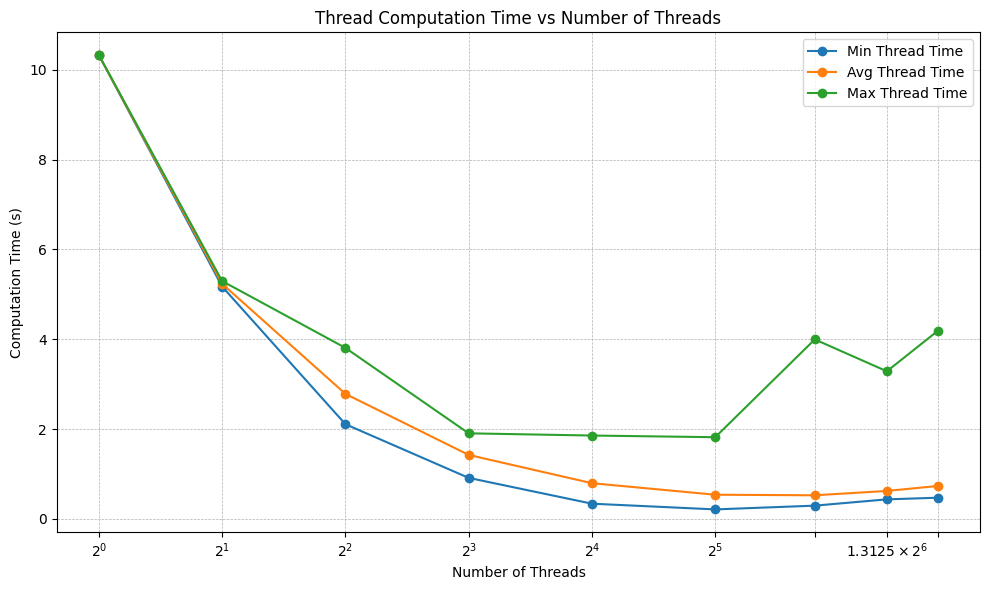

In [2]:
plt.figure(figsize=(10, 6))
plt.plot(df['Thread'], df['min'], marker='o', label='Min Thread Time')
plt.plot(df['Thread'], df['avg'], marker='o', label='Avg Thread Time')
plt.plot(df['Thread'], df['max'], marker='o', label='Max Thread Time')
plt.xlabel('Number of Threads')
plt.ylabel('Computation Time (s)')
plt.title('Thread Computation Time vs Number of Threads')
plt.xscale('log', base=2)
plt.xticks(df['Thread'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [3]:
# Use avg time for speedup/efficiency
base_time = df['avg'].iloc[0]  # avg time for 1 thread
df['Speedup'] = base_time / df['avg']
df['Efficiency'] = df['Speedup'] / df['Thread']
df

,Thread,min,max,avg,Speedup,Efficiency
0,1,10.328972,10.328972,10.328972,1.000000,1.000000
1,2,5.173797,5.296358,5.235078,1.973031,0.986516
2,4,2.109168,3.808676,2.784718,3.709163,0.927291
3,8,0.914023,1.905946,1.424998,7.248412,0.906051
4,16,0.339407,1.856942,0.795670,12.981477,0.811342
5,32,0.212164,1.819672,0.538996,19.163356,0.598855
6,56,0.295688,3.997122,0.526406,19.621684,0.350387
7,84,0.435887,3.287419,0.623176,16.574727,0.197318
8,112,0.472783,4.192314,0.734385,14.064792,0.125578


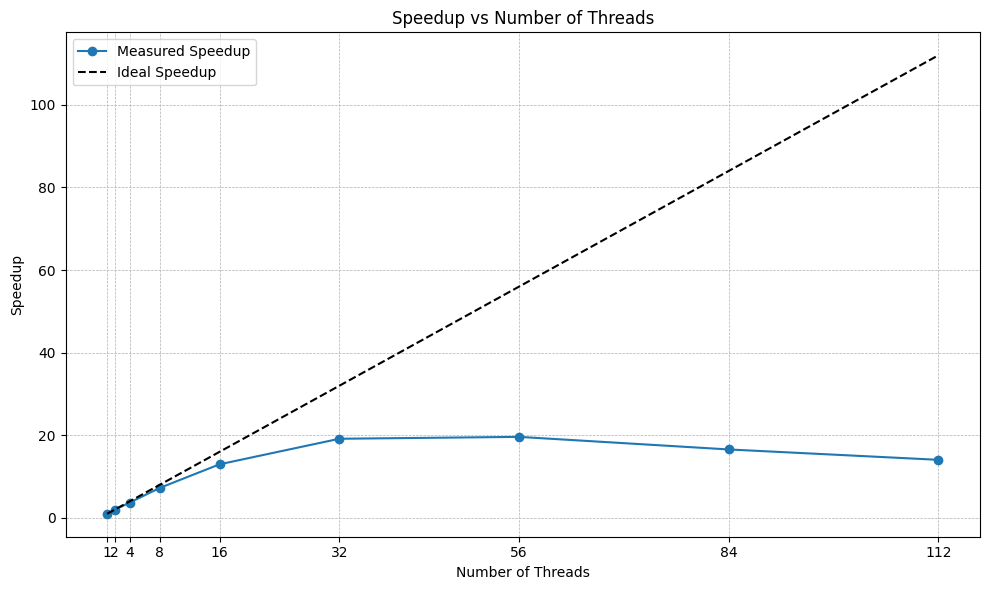

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df['Thread'], df['Speedup'], marker='o', label='Measured Speedup')
plt.plot(df['Thread'], df['Thread'], 'k--', label='Ideal Speedup')  # Ideal: speedup = threads
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Threads')
plt.xscale('linear')
plt.xticks(df['Thread'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

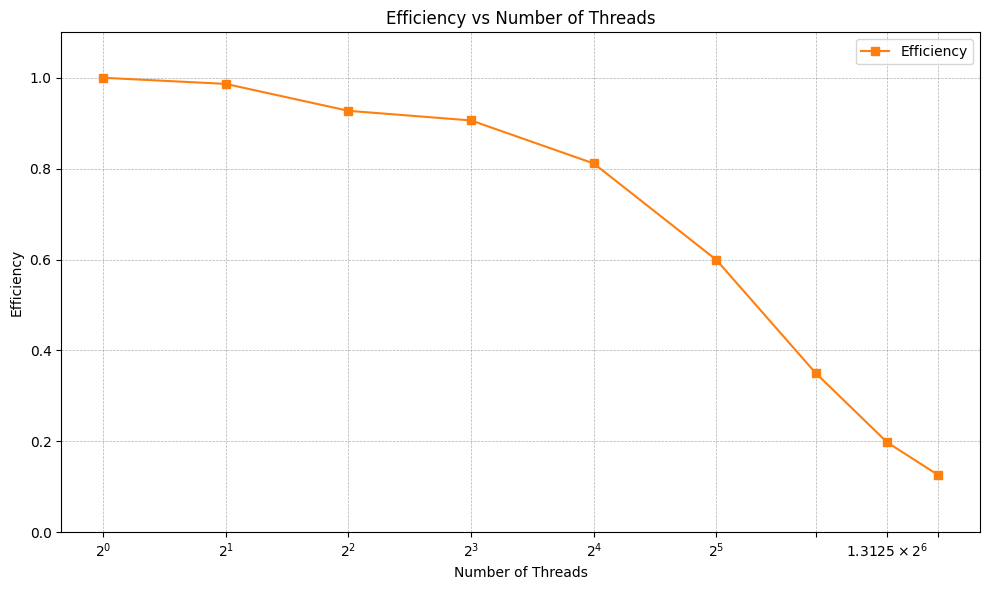

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df['Thread'], df['Efficiency'], marker='s', color='tab:orange', label='Efficiency')
plt.xlabel('Number of Threads')
plt.ylabel('Efficiency')
plt.title('Efficiency vs Number of Threads')
plt.xscale('log', base=2)
plt.xticks(df['Thread'])
plt.ylim(0, 1.1)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()